# 1. DATA

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# 데이터 읽어오기
data_path = os.getcwd() +'/data/'
data = data_path + 'train.csv'
sub = data_path + 'test.csv'

In [3]:
# 데이터 확인
data = pd.read_csv(data)
print('train data : {}'.format(data.shape))

sub = pd.read_csv(sub)
print('sub data : {}'.format(sub.shape))

train data : (15035, 21)
sub data : (6468, 20)


In [4]:
# target 데이터 분리 
print(set(data) - set(sub))
y = data['price']
data = data.drop(['price'], axis=1)
print(y.shape)

{'price'}
(15035,)


In [5]:
train_len = len(data)
print(train_len)
data = pd.concat((data, sub), axis=0)
print(len(data))

15035
21503


In [6]:
# 예측해야 할 값 : y(price)
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

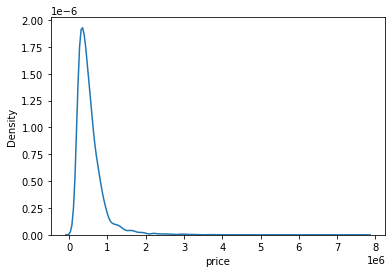

In [7]:
# kdeplot : 이산(discrete)데이터(=불연속 데이터)의 경우에도 부드러운 곡선으로 전체 분포를 확인할 수 있도록 하는 시각화 함수입니다.
sns.kdeplot(y)

In [8]:
# 학습이 편향되지 않고 모델이 robust 더 잘하기 위해서 
# 로그함수
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

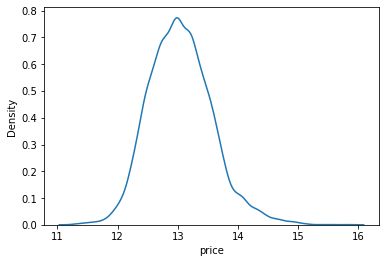

In [9]:
sns.kdeplot(y)
plt.show()

# 2. EDA

<AxesSubplot:>

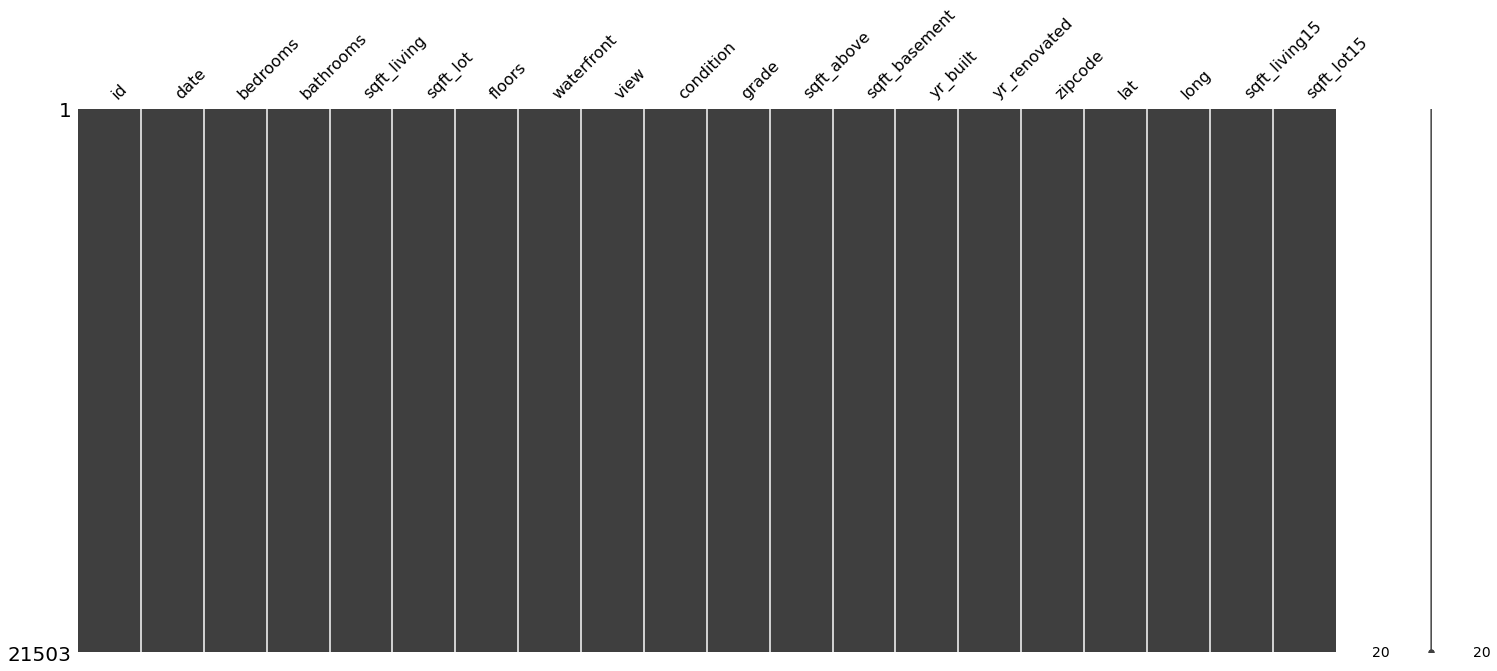

In [10]:
# 결측치 확인
msno.matrix(data)

In [11]:
# 결측치 확인
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [12]:
data.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


In [13]:
# 데이터 타입 변경
# data['date'] : dtype: object -> dtype: int64
print(data['date']) # 20141013T000000
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(int)
print(data['date'])

0       20141013T000000
1       20150225T000000
2       20150218T000000
3       20140627T000000
4       20150115T000000
             ...       
6463    20140626T000000
6464    20150126T000000
6465    20150219T000000
6466    20140623T000000
6467    20150116T000000
Name: date, Length: 21503, dtype: object
0       201410
1       201502
2       201502
3       201406
4       201501
         ...  
6463    201406
6464    201501
6465    201502
6466    201406
6467    201501
Name: date, Length: 21503, dtype: int64


In [14]:
# data['id'] 삭제
sub_id = data['id'][train_len:]
del data['id']

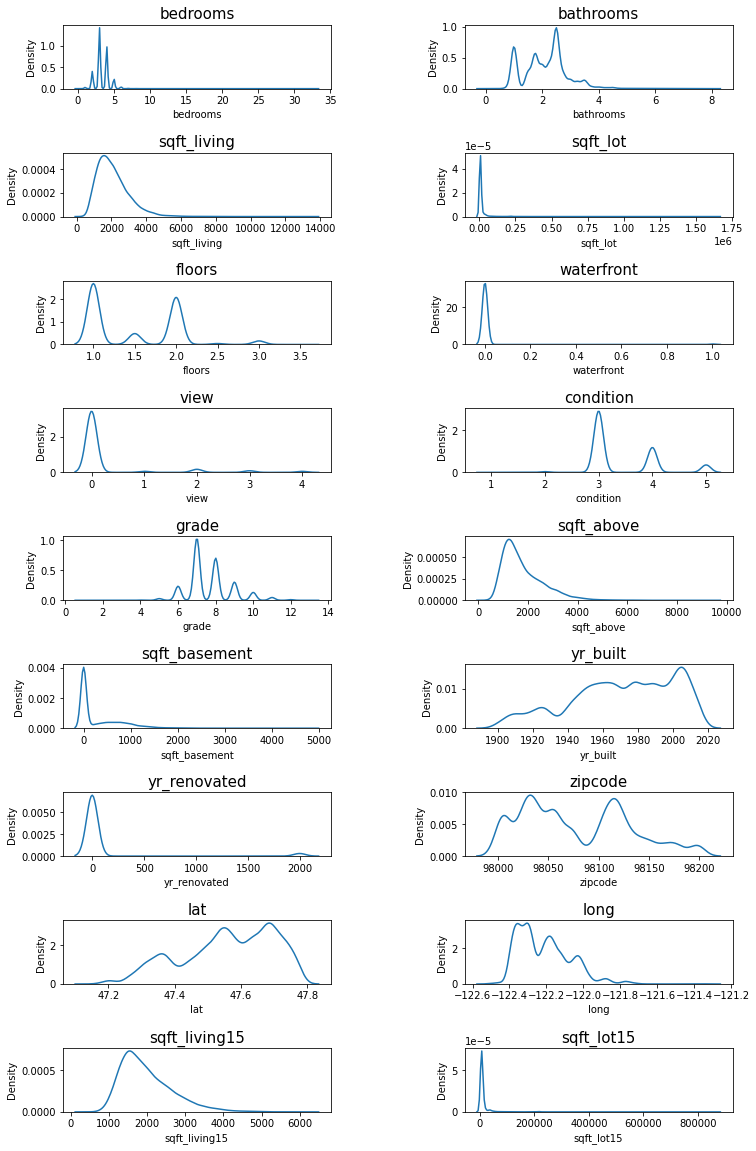

In [15]:
#데이터 분포 확인
def check_distribution(data, col=1):
    row = int(data.shape[1]/col)
    count = 1
    columns = data.columns
    
    fig, ax = plt.subplots(row, col, figsize=(12,20))
    
    for i in range(row):
        for j in range(col):
            sns.kdeplot(data=data[columns[count]], ax=ax[i][j])
            ax[i][j].set_title(columns[count], fontsize=15)
            count += 1
            if count == data.shape[1]:
                break
    plt.subplots_adjust(wspace=0.5, hspace=1)
    
check_distribution(data, col=2)

In [16]:
# log scaling(로그 변환)

skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
# waterfront, view 대부분 값이 0이라 로그취해도 값이 별 차이 없음

def log_scaling(data, skew_columns):
    for c in skew_columns:
        data[c] = np.log1p(data[c].values)
    return data

log_scaling(data, skew_columns)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,1.386294,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.000000,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,1.098612,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.000000,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,1.386294,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.000000,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,1.386294,2.25,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.000000,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,1.386294,1.50,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.000000,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,201406,1.386294,1.75,7.313887,9.390075,1.0,0,0,3,6,7.313887,0.000000,2014,0,98010,47.3095,-122.002,1320,11303
6464,201501,1.386294,2.00,7.307202,7.027315,3.0,0,0,3,8,7.307202,0.000000,2014,0,98144,47.5699,-122.288,1400,1230
6465,201502,1.386294,2.50,7.178545,7.166266,2.0,0,0,3,8,7.074117,4.875197,2008,0,98116,47.5773,-122.409,1330,1265
6466,201406,1.098612,0.75,6.928538,7.208600,2.0,0,0,3,7,6.928538,0.000000,2009,0,98144,47.5944,-122.299,1020,2007


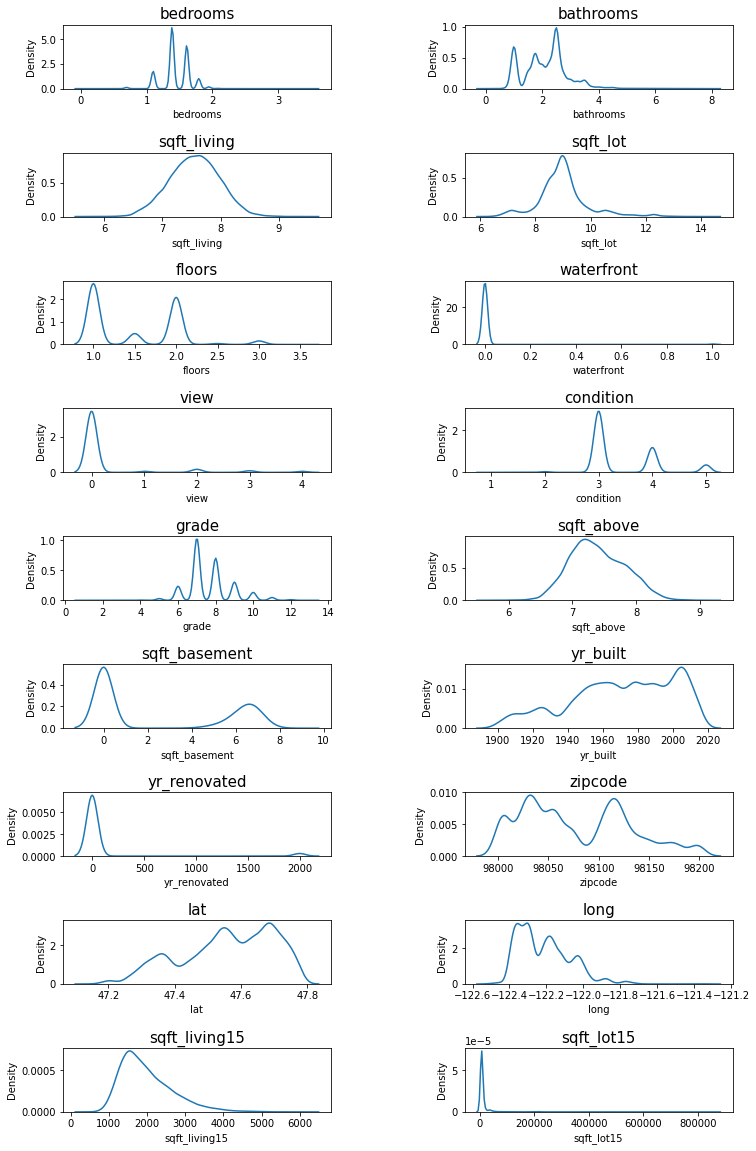

In [17]:
# 데이터 분산 재확인
check_distribution(data, col=2)

In [18]:
# normalization : use robustscaler: 이상치 값 영향 최소화
def robust_scale(df):
    robustscaler = RobustScaler()
    robustscaler.fit(df)

    df = robustscaler.transform(df) 
    return df

robust_scale(data)

array([[ 0.        ,  0.        , -1.66666667, ..., -0.13300493,
        -0.56818182, -0.39518556],
       [ 0.96842105, -1.28922423, -1.66666667, ..., -0.01477833,
         1.        ,  0.088666  ],
       [ 0.96842105,  0.        , -0.33333333, ...,  0.91133005,
        -0.04545455, -0.02347041],
       ...,
       [ 0.96842105,  0.        ,  0.33333333, ..., -0.8817734 ,
        -0.57954545, -1.27482447],
       [-0.04210526, -1.28922423, -2.        , ..., -0.33990148,
        -0.93181818, -1.12597793],
       [ 0.95789474,  0.        ,  0.33333333, ...,  0.79310345,
        -0.48863636, -1.27041123]])

In [19]:
# x : train data, y : train label, sub : submission

x = data.iloc[:train_len, :] 
sub = data.iloc[train_len:, :] 
print( 'x', x.shape, 'sub', sub.shape)

x (15035, 19) sub (6468, 19)


# 3. Model

In [20]:
random_state = 2024

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

lightgbm = LGBMRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)
gboost = GradientBoostingRegressor(random_state=random_state)

models = [{'model':gboost, 'name':'GradientBoosting'}, 
          {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}, 
          {'model':rdforest, 'name':'RandomForestRegressor'}]


In [21]:
# 교차 검증을 통해 모델의 성능을 간단히 평가

from sklearn.model_selection import KFold, cross_val_score

def get_cv_score(models):
    kfold = KFold(n_splits=5, shuffle=True, random_state=random_state).get_n_splits(x.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], x.values, y)), 
                                             kf=kfold))
        
get_cv_score(models)
'''
-> normalization 사용 X
Model GradientBoosting CV score : 0.8594
Model XGBoost CV score : 0.8861
Model LightGBM CV score : 0.8819
Model RandomForestRegressor CV score : 0.8693


-> normalization 사용 O
Model GradientBoosting CV score : 0.8796
Model XGBoost CV score : 0.8973
Model LightGBM CV score : 0.9025
Model RandomForestRegressor CV score : 0.8859

-> RandomForestRegressor 오래걸려요
'''

Model GradientBoosting CV score : 0.8796
Model XGBoost CV score : 0.8973
Model LightGBM CV score : 0.9025
Model RandomForestRegressor CV score : 0.8858


'\n-> normalization 사용 X\nModel GradientBoosting CV score : 0.8594\nModel XGBoost CV score : 0.8861\nModel LightGBM CV score : 0.8819\nModel RandomForestRegressor CV score : 0.8693\n\n\n-> normalization 사용 O\nModel GradientBoosting CV score : 0.8796\nModel XGBoost CV score : 0.8973\nModel LightGBM CV score : 0.9025\nModel RandomForestRegressor CV score : 0.8859\n\n-> RandomForestRegressor 오래걸려요\n'

In [22]:
# 학습 후 예측 결괏값을 모아서 평균한 값을 반환
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [23]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
print(y_pred)
'''
6468
[13.12109246 13.0178501  14.08051373 ... 13.03127083 12.71623304
 12.99256396]
'''

6468
[13.12109246 13.0178501  14.08051373 ... 13.03127083 12.71623304
 12.99256396]


'\n6468\n[13.12109246 13.0178501  14.08051373 ... 13.03127083 12.71623304\n 12.99256396]\n'

# 4. 하이퍼 파라미터 튜닝

In [24]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [25]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [26]:
help(lightgbm)

Help on LGBMRegressor in module lightgbm.sklearn object:

class LGBMRegressor(sklearn.base.RegressorMixin, LGBMModel)
 |  LGBMRegressor(boosting_type: str = 'gbdt', num_leaves: int = 31, max_depth: int = -1, learning_rate: float = 0.1, n_estimators: int = 100, subsample_for_bin: int = 200000, objective: Union[str, Callable, NoneType] = None, class_weight: Union[Dict, str, NoneType] = None, min_split_gain: float = 0.0, min_child_weight: float = 0.001, min_child_samples: int = 20, subsample: float = 1.0, subsample_freq: int = 0, colsample_bytree: float = 1.0, reg_alpha: float = 0.0, reg_lambda: float = 0.0, random_state: Union[int, numpy.random.mtrand.RandomState, NoneType] = None, n_jobs: int = -1, silent: Union[bool, str] = 'warn', importance_type: str = 'split', **kwargs)
 |  
 |  LightGBM regressor.
 |  
 |  Method resolution order:
 |      LGBMRegressor
 |      sklearn.base.RegressorMixin
 |      LGBMModel
 |      sklearn.base.BaseEstimator
 |      builtins.object
 |  
 |  Methods d

In [35]:
# 바꿀 값들
param_grid = {
    'num_leaves': [15, 31, 50],
    'max_depth': [-10, -1, 10],    
    'learning_rate':[0.01, 0.1, 1.0],
    'n_estimators': [50, 100, 150]
}

best_model = lightgbm

best = my_GridSearch(best_model, x, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=15; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=31; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=50; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=15; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=31; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=50; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=15; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=31; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=50; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=15; to

[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=15; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=31; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=31; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=50; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=15; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=31; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=50; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=15; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=31; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=50; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=-1, n

[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=15; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=50, num_leaves=50; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=15; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=31; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=50; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=15; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=31; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=50; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=31; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=50; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=-1, n_e

In [37]:
print(best)

    learning_rate  max_depth  n_estimators  num_leaves     score     RMSLE
52           0.10         10           150          31 -0.026456  0.162652
43           0.10         -1           150          31 -0.026459  0.162662
34           0.10        -10           150          31 -0.026459  0.162662
53           0.10         10           150          50 -0.026594  0.163078
44           0.10         -1           150          50 -0.026609  0.163123
..            ...        ...           ...         ...       ...       ...
19           0.01         10            50          31 -0.138643  0.372348
1            0.01        -10            50          31 -0.138643  0.372348
18           0.01         10            50          15 -0.146291  0.382480
9            0.01         -1            50          15 -0.146291  0.382480
0            0.01        -10            50          15 -0.146291  0.382480

[81 rows x 6 columns]


In [40]:
# 하이퍼파라미터 설정, 학습 

best = LGBMRegressor(learning_rate = 0.10,
                       max_depth = 10,
                       n_estimators = 150,
                       num_leaves = 31                       
                      )

best.fit(x,y)

prediction = best.predict(sub)
prediction

array([13.11590791, 13.07124691, 14.12791796, ..., 13.0370532 ,
       12.71430206, 12.97328079])

In [41]:
# 모델 성능 재비교

'''
이전 성능
Model LightGBM CV score : 0.9025
'''

kfold = KFold(n_splits=5, shuffle=True, random_state=random_state).get_n_splits(x.values)       
print("Model {} CV score : {:.4f}".format('lightgbm', np.mean(cross_val_score(best, x, y)),kf=kfold))


Model lightgbm CV score : 0.9047


In [42]:
# 예측 결과에 np.expm1()을 씌워서 다시 원래 스케일로 되돌리기
prediction = np.expm1(prediction)
prediction

array([ 496781.66268765,  475083.00209259, 1366710.37495195, ...,
        459112.71482487,  332468.05158332,  430747.98332737])

# 5. 제출

In [43]:
# def save_submission(model, train, y, test, model_name, rmsle=None):
#     model.fit(train, y)
    
#     prediction = model.predict(test)
    
#     prediction = np.expm1(prediction)
    
#     data_dir = '~/aiffel/kaggle_kakr_housing/data/'
    
#     submission_path = join(data_dir, 'sample_submission.csv')
    
#     submission = pd.read_csv(submission_path)
    
#     submission['price'] = prediction
    
#     submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    
#     submission.to_csv(submission_csv_path, index=False)
    
#     print('{} saved!'.format(submission_csv_path))

In [45]:
# save_submission(best, x, y, sub, 'lightgbm', rmsle = '##')

NameError: name 'train' is not defined

[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=15; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=15; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=31; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=50; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=15; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=31; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=50; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=15; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=15; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=31; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=-1, n_e

[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=50; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=15; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=15; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=50; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=50; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=100, num_leaves=15; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=100, num_leaves=31; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=100, num_leaves=50; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=150, num_leaves=15; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=150, num_leaves=31; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=-1, n_estimato

[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=15; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=31; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=100, num_leaves=50; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=15; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=31; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=-10, n_estimators=150, num_leaves=50; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=31; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=50, num_leaves=50; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=100, num_leaves=31; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=-1, n_estimators=100, num_leaves=50; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=-1, n_e

In [46]:
submission = pd.read_csv(data_path+'/sample_submission.csv')
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [47]:
sub = pd.DataFrame(data={'id':sub_id,'price':prediction})
sub.head()

,id,price
0,15035,4.967817e+05
1,15036,4.750830e+05
2,15037,1.366710e+06
3,15038,2.990007e+05
4,15039,3.355549e+05


In [48]:
submission_csv_path = '{}/submission_sy_{}.csv'.format(data_path,'0830')
sub.to_csv(submission_csv_path, index=False)


# 6. 회고

In [ ]:
'''
성능 비교
Model LightGBM CV score : 0.9025 -> 0.9047
kaggle Private Score: 113468.33552

모델을 잘 알아야 하이퍼파라미터를 통한 성능향상도 가능하다
'''